# ✈️ AIRLINE PASSENGER (TIME SERIES) PREDICTION USING LSTM 📊

We will use the Airline Passenger dataset for this project. This dataset provides monthly totals of US airline passengers from 1949 to 1960. You can download the dataset from the Kaggle link below: 
[Download Dataset](https://www.kaggle.com/chirag19/air-passengers)

We will utilize the LSTM (Long Short-Term Memory) deep learning model for this project. The LSTM network is a type of recurrent neural network (RNN) that is trained using Backpropagation through time and overcomes the vanishing gradient problem. LSTM can be employed to create large recurrent networks, which can address difficult sequence problems in machine learning and achieve state-of-the-art results. Unlike traditional neurons, LSTM networks have memory blocks that are connected through layers.

## 🎯 Aim of the Project

Given the number of passengers (in units of thousands) for the last two months, what will be the number of passengers next month? To address this problem, we will build an LSTM model and train it with our training data, which comprises the first 100 months in our dataset. After the LSTM model has been trained and has learned the pattern in the time series training data, we will ask it the aforementioned question and obtain the answer from it.

## 📋 Dataset Information

| Attribute      | Description                                            |
| -------------- | ------------------------------------------------------ |
| Name           | Airline Passenger Dataset                             |
| Source         | [Kaggle](https://www.kaggle.com/chirag19/air-passengers) |
| Description    | Monthly totals of US airline passengers from 1949 to 1960 |

## 🛠️ Project Workflow

1. **Data Loading**: Load the Airline Passenger dataset.
2. **Data Preprocessing**: Preprocess the dataset by converting the date column to datetime format, setting it as index, and handling missing values if any.
3. **Exploratory Data Analysis (EDA)**: Explore the dataset visually to understand the underlying patterns and trends.
4. **Feature Engineering**: Create additional features if necessary.
5. **Data Splitting**: Split the dataset into training and testing sets. We'll use the first 100 months as the training set and the remaining months as the testing set.
6. **Model Building**: Build an LSTM model architecture using Keras.
7. **Model Training**: Train the LSTM model using the training dataset.
8. **Model Evaluation**: Evaluate the trained model's performance on the testing dataset using appropriate metrics.
9. **Prediction**: Use the trained LSTM model to predict the number of passengers for the next month based on the passenger counts of the last two months.
10. **Conclusion**: Summarize the findings and insights from the project.

## 📈 Analysis and Results

- Perform a detailed analysis of the LSTM model's performance.
- Visualize the predicted values against the actual values to assess the model's accuracy.
- Interpret the results and draw conclusions.

## 📚 References

- [LSTM Network - Wikipedia](https://en.wikipedia.org/wiki/Long_short-term_memory)
- [Keras Documentation](https://keras.io/)
- [Kaggle Dataset](https://www.kaggle.com/chirag19/air-passengers)

## 🚀 Let's get started!


### Data Loading

In [1]:
# Gerekli kütüphaneleri içe aktarın
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.animation import FuncAnimation
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D

### 📊 Veri Yükleme


In [2]:
# Veriyi yükle
data = pd.read_csv('./data/AirPassengers.csv')

### 🛠️ Veri Ön İşleme

In [3]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [5]:
data.shape

(144, 2)

In [6]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


### Exploratory Data Analysis (EDA)

In [7]:
data.columns

Index(['Month', '#Passengers'], dtype='object')

In [8]:
# Sütun adını yeniden adlandır
data.rename(columns={'#Passengers': 'passengers'}, inplace=True)

# Sadece yolcu sayısı verilerini içerecek şekilde veriyi filtrele
data = data['passengers']

In [9]:
type(data)

pandas.core.series.Series

In [10]:
data

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: passengers, Length: 144, dtype: int64

In [11]:
data=np.array(data).reshape(-1,1)

In [12]:
type(data)

numpy.ndarray

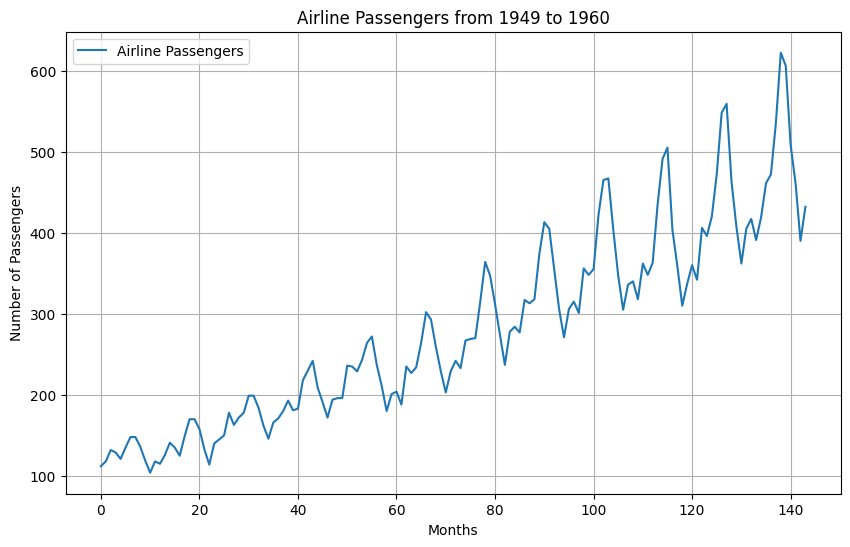

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(data, label='Airline Passengers')
plt.title('Airline Passengers from 1949 to 1960')
plt.xlabel('Months')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

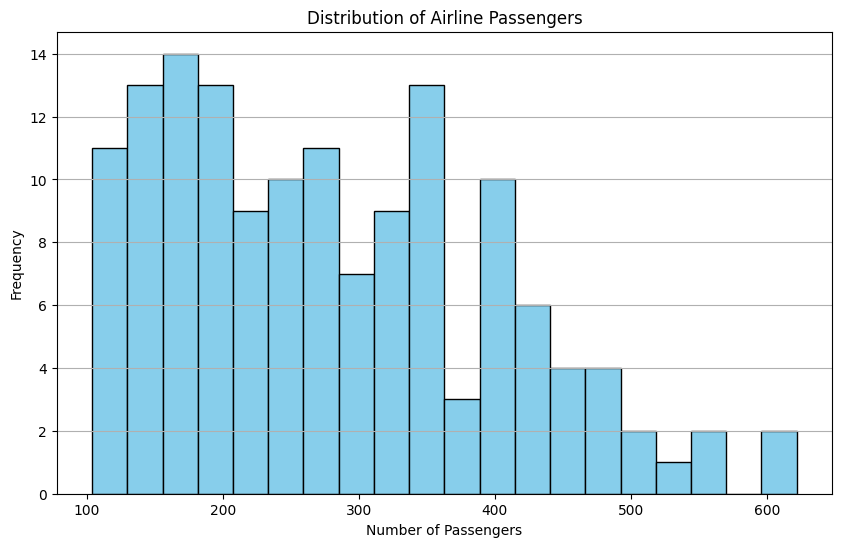

In [14]:
# Verinin histogramını çizme
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Airline Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

##### Kutu Grafiği (Box Plot): Verinin merkezi eğilimini, dağılımını ve aykırı değerlerini göstermek için kutu grafiği kullanabiliriz.

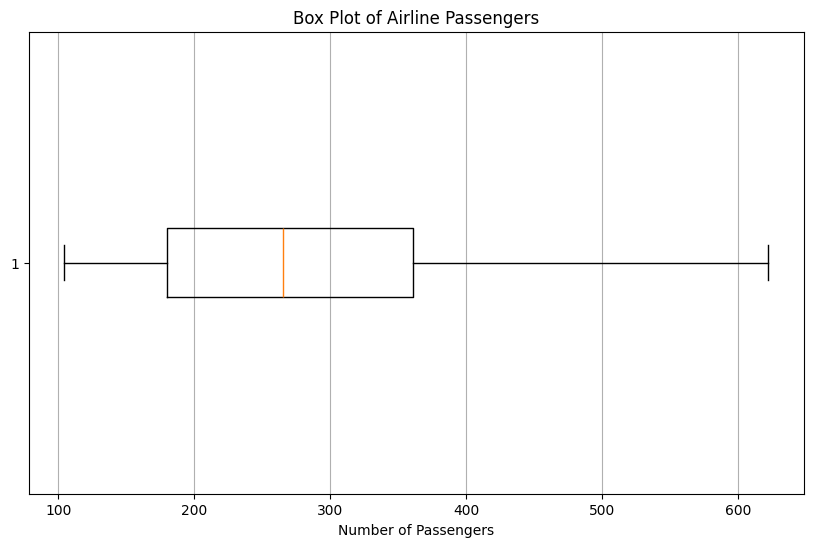

In [15]:
# Kutu grafiği çizme
plt.figure(figsize=(10, 6))
plt.boxplot(data, vert=False)
plt.title('Box Plot of Airline Passengers')
plt.xlabel('Number of Passengers')
plt.grid(axis='x')
plt.show()

Text(0, 0.5, 'Density')

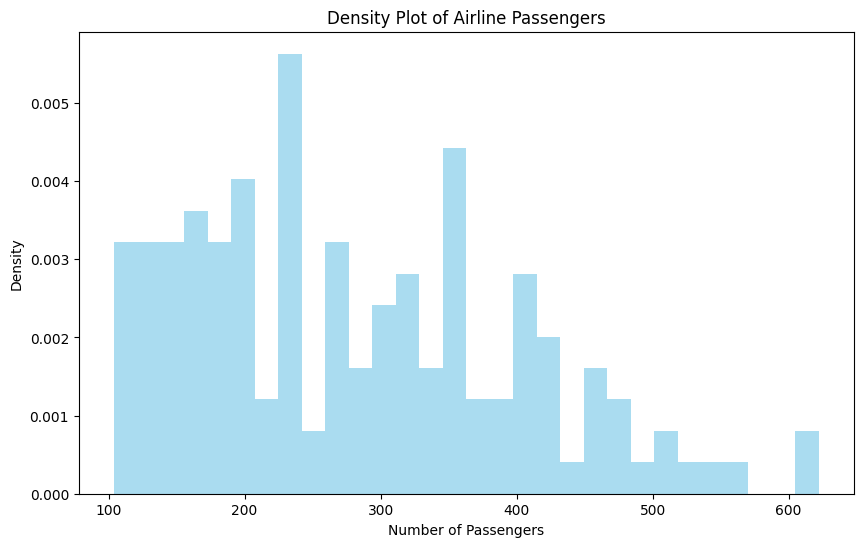

In [16]:
# Yoğunluk grafiği çizme
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, color='skyblue', alpha=0.7)
plt.title('Density Plot of Airline Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Density')

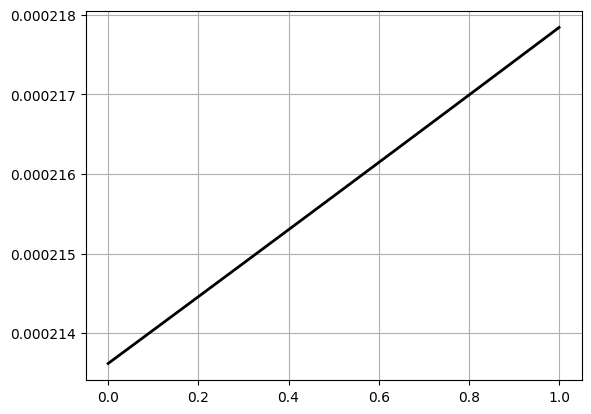

In [17]:
# Yoğunluk fonksiyonunu çizme
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5 * ((x - data.mean()) / data.std())**2) / (np.sqrt(2 * np.pi) * data.std())
plt.plot(x, p, 'k', linewidth=2)

plt.grid(True)
plt.show()

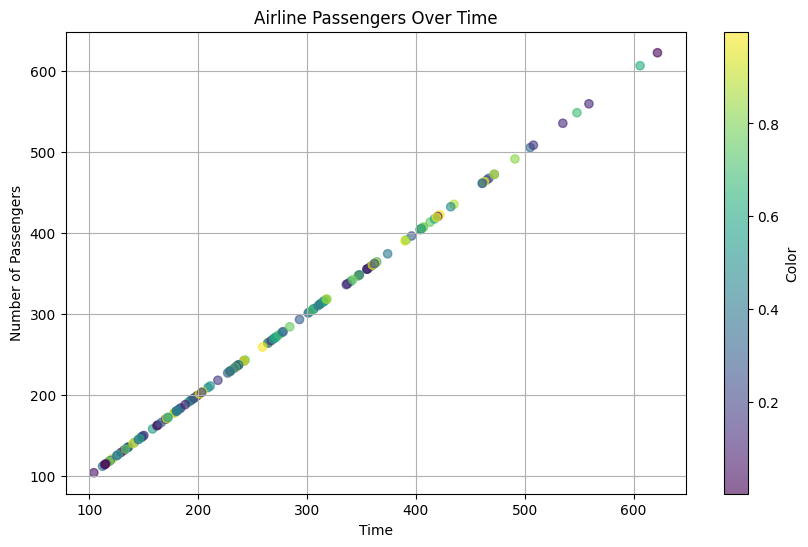

In [18]:
# Verinin zaman içindeki değişimini renkli bir eğriyle görselleştirme
plt.figure(figsize=(10, 6))
colors = np.random.rand(len(data))
plt.scatter(data, data, c=colors, cmap='viridis', alpha=0.6)
plt.title('Airline Passengers Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.colorbar(label='Color')
plt.grid(True)
plt.show()

In [19]:
# Paralel Koordinatlar Grafiği
def parallel_coordinates(data, labels):
    dimensions = len(labels)
    data_normalized = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

    plt.figure(figsize=(10, 6))
    for i in range(len(data_normalized)):
        plt.plot(range(dimensions), data_normalized[i], label='Line {}'.format(i+1))
    plt.title('Parallel Coordinates Plot')
    plt.xlabel('Features')
    plt.ylabel('Normalized Values')
    plt.xticks(range(dimensions), labels)
    plt.legend()
    plt.grid(True)
    plt.show()

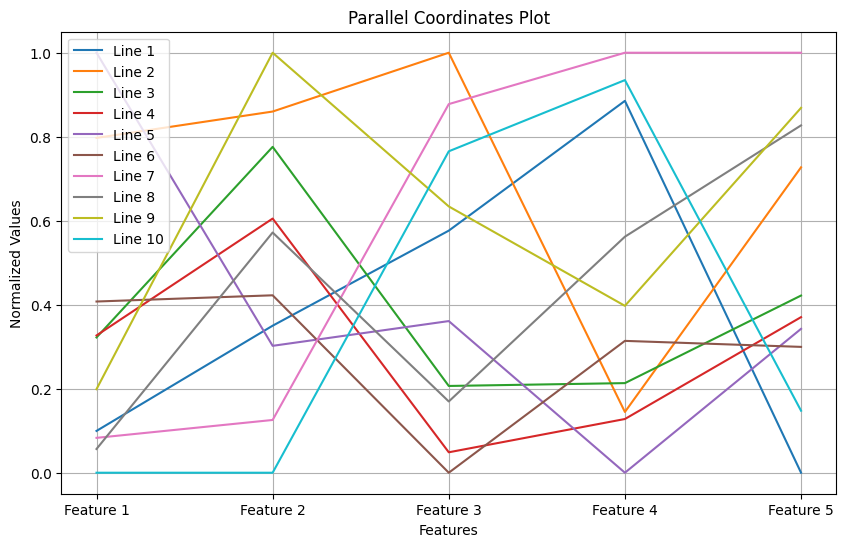

In [20]:
# Veri ve etiketler
data = np.random.rand(10, 5)  # Örnek veri, şekli (10, 5)
labels = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5']

# Paralel koordinatlar grafiği oluşturma
parallel_coordinates(data, labels)

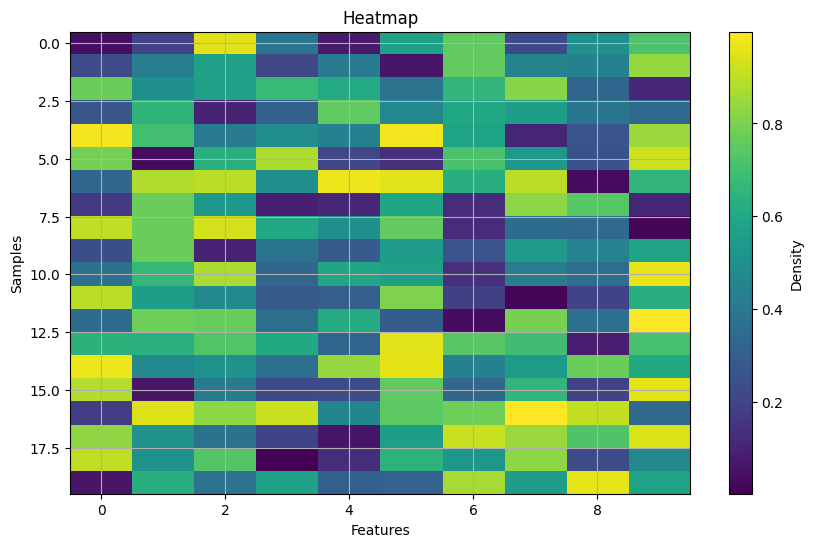

In [21]:
# Heatmap (Isı Haritası)
def heatmap(data):
    plt.figure(figsize=(10, 6))
    plt.imshow(data, cmap='viridis', aspect='auto')
    plt.colorbar(label='Density')
    plt.title('Heatmap')
    plt.xlabel('Features')
    plt.ylabel('Samples')
    plt.grid(True)
    plt.show()

# Örnek veri oluşturma
data = np.random.rand(20, 10)  # Örnek veri, şekli (20, 10)

# Isı haritası oluşturma
heatmap(data)

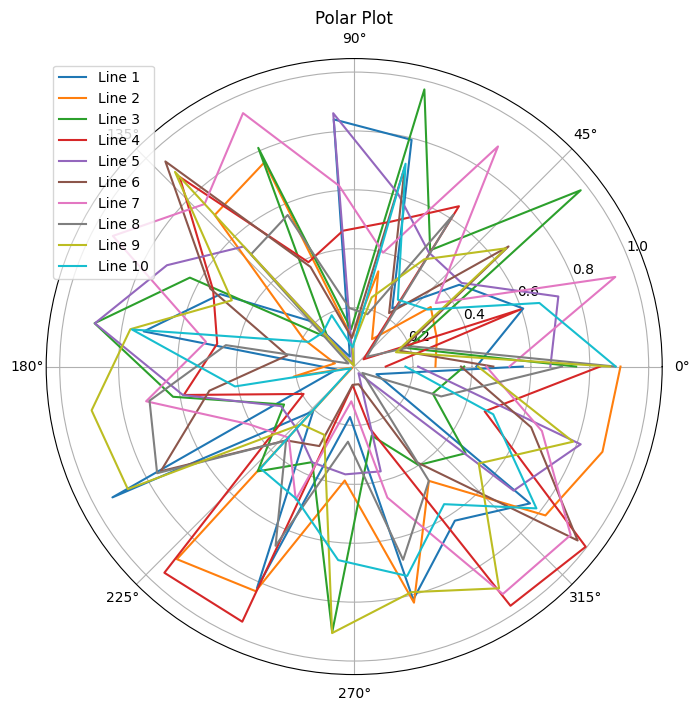

In [22]:
def polar_plot(data):
    theta = np.linspace(0, 2*np.pi, data.shape[1])  # Theta dizisi her bir sütunun sayısı kadar olmalı
    plt.figure(figsize=(8, 8))
    for i in range(data.shape[0]):  # Her bir örneği (satırı) döngü içinde ele alıyoruz
        plt.polar(theta, data[i], label='Line {}'.format(i+1))
    plt.title('Polar Plot')
    plt.legend()
    plt.grid(True)
    plt.show()

# Örnek veri oluşturma
data = np.random.rand(10, 20)  # Örnek veri, şekli (10, 20)

# Polar grafik oluşturma
polar_plot(data)

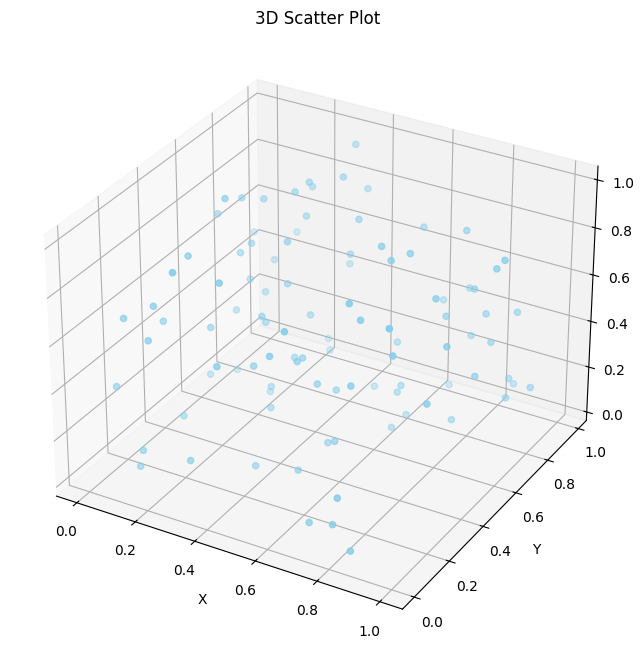

In [23]:
# 3D Scatter Plot (Nokta Grafiği)
def scatter_plot_3d(data):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='skyblue', marker='o')
    ax.set_title('3D Scatter Plot')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

# Örnek veri oluşturma
data = np.random.rand(100, 3)  # Örnek veri, şekli (100, 3)

# 3D Scatter Plot oluşturma
scatter_plot_3d(data)

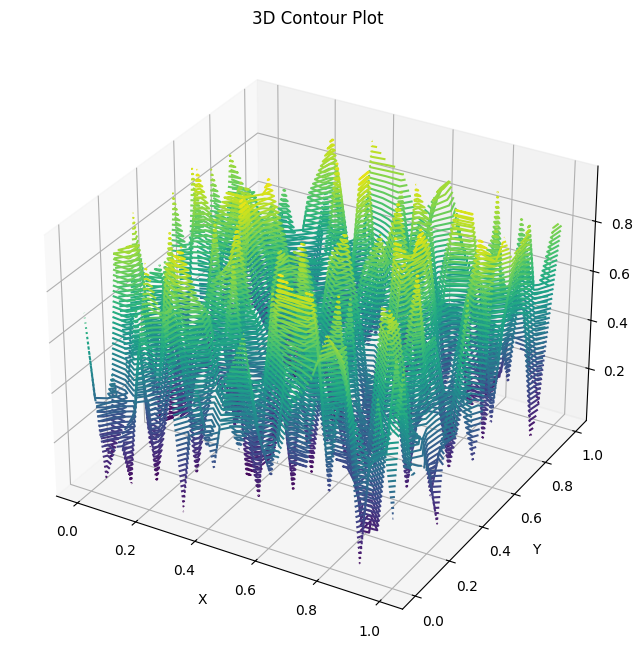

In [24]:
# 3D Contour Plot (Kontur Grafiği)
def contour_plot_3d(data):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    x = np.linspace(0, 1, data.shape[0])
    y = np.linspace(0, 1, data.shape[1])
    X, Y = np.meshgrid(x, y)
    ax.contour3D(X, Y, data, 50, cmap='viridis')
    ax.set_title('3D Contour Plot')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

# Örnek veri oluşturma
data = np.random.rand(20, 20)  # Örnek veri, şekli (20, 20)

# 3D Contour Plot oluşturma
contour_plot_3d(data)

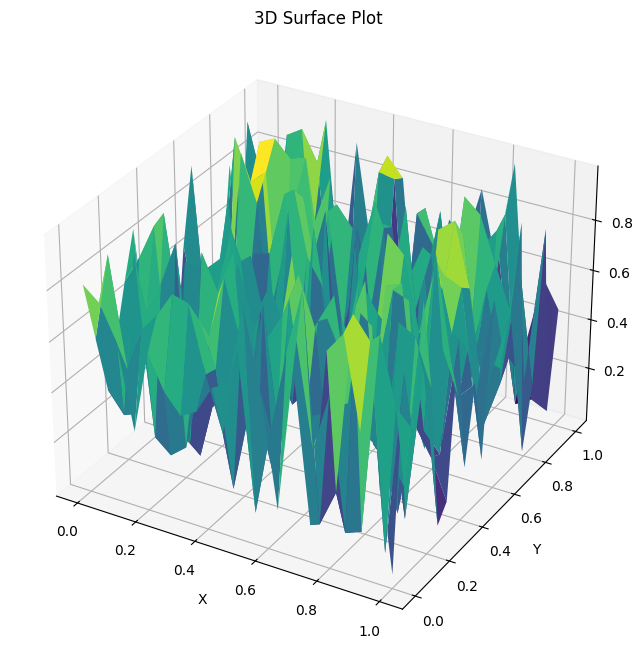

In [25]:
# 3D Yüzey Plot (Surface Plot)
def surface_plot_3d(data):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    x = np.linspace(0, 1, data.shape[0])
    y = np.linspace(0, 1, data.shape[1])
    X, Y = np.meshgrid(x, y)
    ax.plot_surface(X, Y, data, cmap='viridis')
    ax.set_title('3D Surface Plot')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

# Örnek veri oluşturma
data = np.random.rand(20, 20)  # Örnek veri, şekli (20, 20)

# 3D Yüzey Plot oluşturma
surface_plot_3d(data)

In [26]:
# Örnek veri oluşturma
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

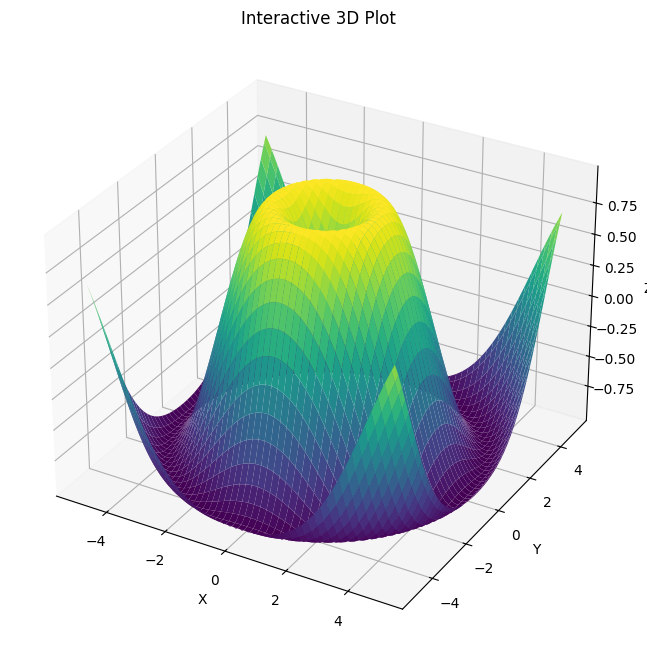

In [27]:
# İnteraktif 3D görselleştirme
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title('Interactive 3D Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [28]:
# Veriyi normalize et
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [29]:
def train_test_split(data, test_ratio=0.2):
    # Veri setinin boyutunu belirleme
    num_samples = len(data)
    
    # Test setinin boyutunu hesaplama
    num_test_samples = int(test_ratio * num_samples)
    
    # Veriyi karıştırma (shuffle)
    np.random.shuffle(data)
    
    # Test seti ve eğitim setini oluşturma
    X_train = data[:-num_test_samples, :-1]
    y_train = data[:-num_test_samples, -1]
    X_test = data[-num_test_samples:, :-1]
    y_test = data[-num_test_samples:, -1]
    
    return X_train, X_test, y_train, y_test

In [30]:
# Veriyi eğitim ve test setlerine bölmek için fonksiyonu kullanma
X_train, X_test, y_train, y_test = train_test_split(scaled_data, test_ratio=0.2)

In [31]:
# LSTM modeli oluşturma
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Uyarıyı gidermek için TensorFlow'un uyumlu bir işlevini kullanma
tf.compat.v1.get_default_graph()

In [32]:
# Modeli derleme
model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
# Modeli eğitme
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100

1/1 [==============================] - 4s 4s/step - loss: 0.3246 - val_loss: 0.1545
Epoch 2/100
1/1 [==============================] - 0s 45ms/step - loss: 0.2719 - val_loss: 0.1085
Epoch 3/100
1/1 [==============================] - 0s 46ms/step - loss: 0.2253 - val_loss: 0.0691
Epoch 4/100
1/1 [==============================] - 0s 52ms/step - loss: 0.1852 - val_loss: 0.0380
Epoch 5/100
1/1 [==============================] - 0s 43ms/step - loss: 0.1535 - val_loss: 0.0187
Epoch 6/100
1/1 [==============================] - 0s 44ms/step - loss: 0.1338 - val_loss: 0.0158
Epoch 7/100
1/1 [==============================] - 0s 36ms/step - loss: 0.1313 - val_loss: 0.0289
Epoch 8/100
1/1 [==============================] - 0s 45ms/step - loss: 0.1457 - val_loss: 0.0406
Epoch 9/100
1/1 [==============================] - 0s 56ms/step - loss: 0.1583 - val_loss: 0.0402
Epoch 10/100
1/1 [==============================] - 0s 43ms/step - loss: 0.1578 - val_loss: 0.0323
Epoch 11/100
1/1 [==

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 19, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


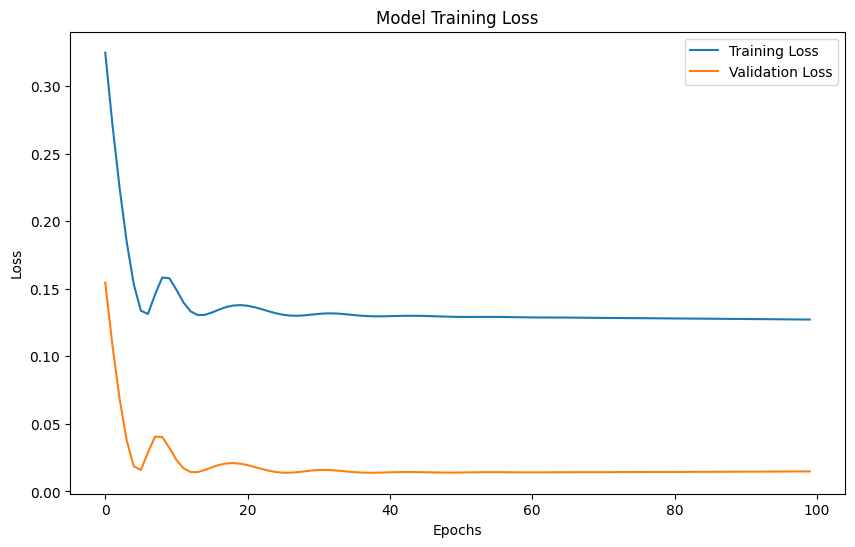

In [35]:
# Modelin eğitim hatası ve doğrulama hatası grafiğini çiz
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
# Test seti üzerinde tahminler yapma
predictions = model.predict(X_test)

1/1 [==============================] - 1s 730ms/step


In [37]:
y_test = y_test.reshape(-1, 1)

In [38]:
print("y_test shape:", y_test.shape)
print("predictions shape:", predictions.shape)


y_test shape: (4, 1)
predictions shape: (4, 1)


In [39]:
# MinMaxScaler'ı y_train verisiyle fit etme
scaler.fit(y_train.reshape(-1, 1))

# Tahminlerin ölçeklendirme işleminden geri dönüşümü
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

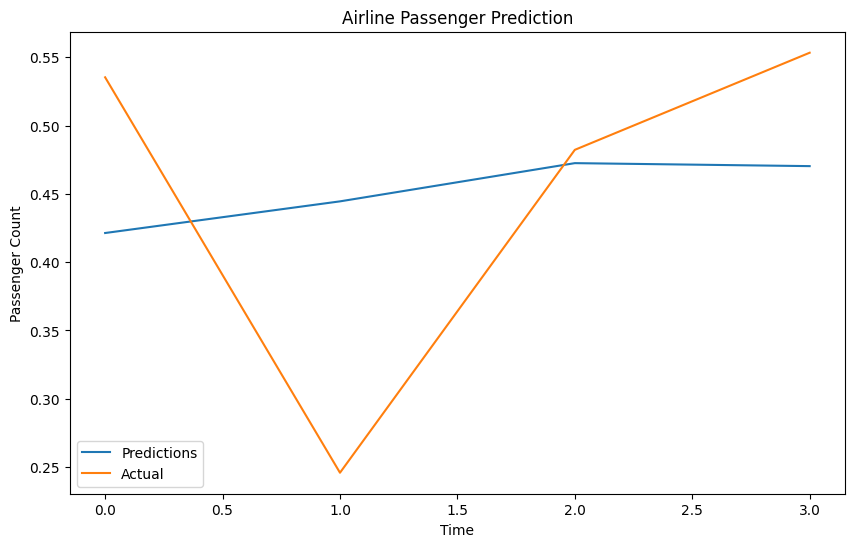

In [40]:
# Tahminlerin ve gerçek değerlerin görselleştirilmesi
plt.figure(figsize=(10, 6))
plt.plot(predictions, label='Predictions')
plt.plot(y_test, label='Actual')
plt.title('Airline Passenger Prediction')
plt.xlabel('Time')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()

In [41]:
# Hata miktarını hesaplama
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.014852617301313455


##### Hata Dağılımı Görselleştirmesi: Modelin hata dağılımını göstermek için bir histogram oluşturabiliriz. Bu, modelin hangi aralıklarda ne kadar hata yaptığını daha iyi anlamamıza yardımcı olabilir.

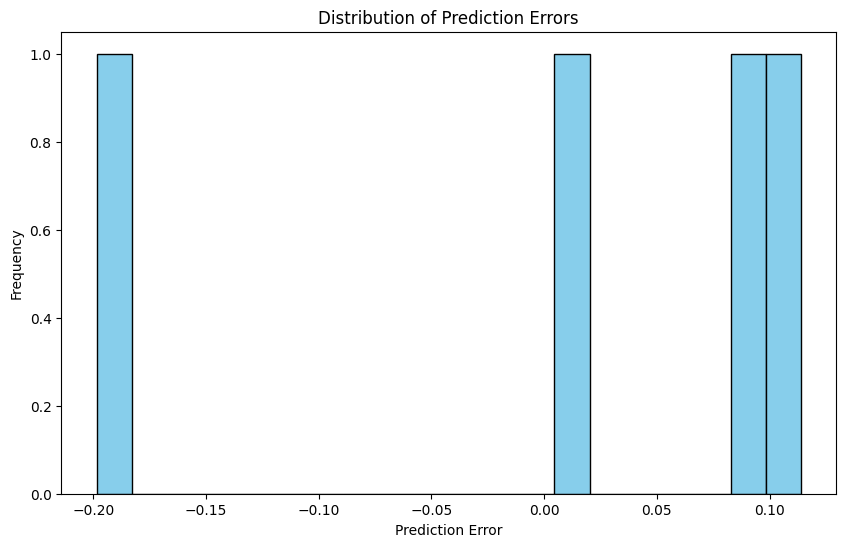

In [42]:
# Hata dağılımı görselleştirmesi
errors = y_test - predictions
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

##### R-kare Skoru: R-kare (coefficient of determination) değeri, modelin bağımsız değişkenler tarafından açıklanan varyansın oranını gösterir. 1'e ne kadar yakınsa, modelin veri üzerinde o kadar iyi uyum sağladığı anlamına gelir.

In [43]:
# R-kare skoru hesaplama
r2 = r2_score(y_test, predictions)
print("R-squared Score:", r2)

R-squared Score: 0.01908428939412865


In [44]:
# Ortalama mutlak hata hesaplama
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.10132120148499492


##### Tahmin Hatalarının Zamana Göre Dağılımı: Tahmin hatalarının zamanla nasıl değiştiğini görselleştirmek, modelin belirli dönemlerde ne kadar doğru veya yanlış tahminler yaptığını anlamamıza yardımcı olabilir. Bunun için, tahmin hatalarını ve gerçek değerleri bir zaman serisi grafiği üzerinde gösterebiliriz.

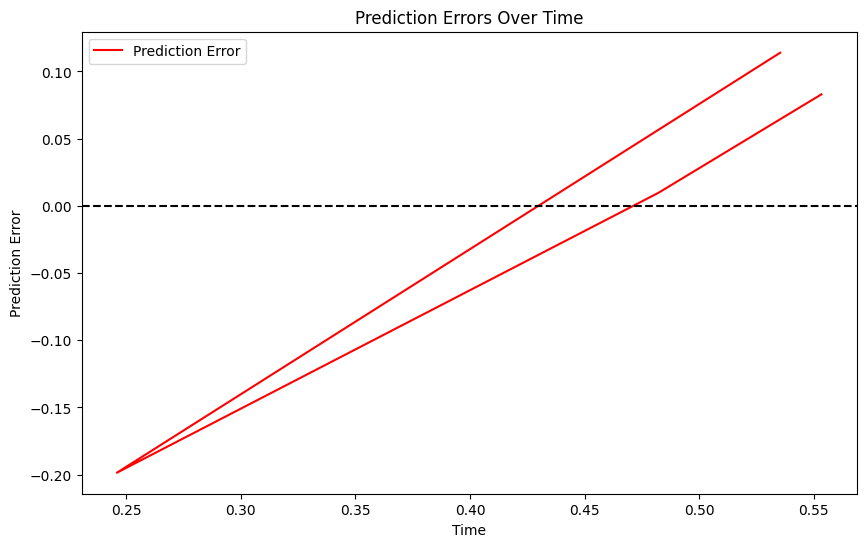

In [45]:
# Tahmin hatalarının zamanla değişimi
error_series = pd.Series(np.ravel(errors), index=np.ravel(y_test))  # errors ve y_test'i düzleştirme
plt.figure(figsize=(10, 6))
plt.plot(error_series, color='red', label='Prediction Error')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Prediction Errors Over Time')
plt.xlabel('Time')
plt.ylabel('Prediction Error')
plt.legend()
plt.show()

##### Hata Analizi: Modelin en çok hata yaptığı zaman dilimlerini veya örnekleri incelemek, modelin zayıf noktalarını belirlememize ve iyileştirmeler yapmamıza yardımcı olabilir. Bunun için, en yüksek hata değerlerine sahip örnekleri veya zaman dilimlerini inceleyebiliriz.

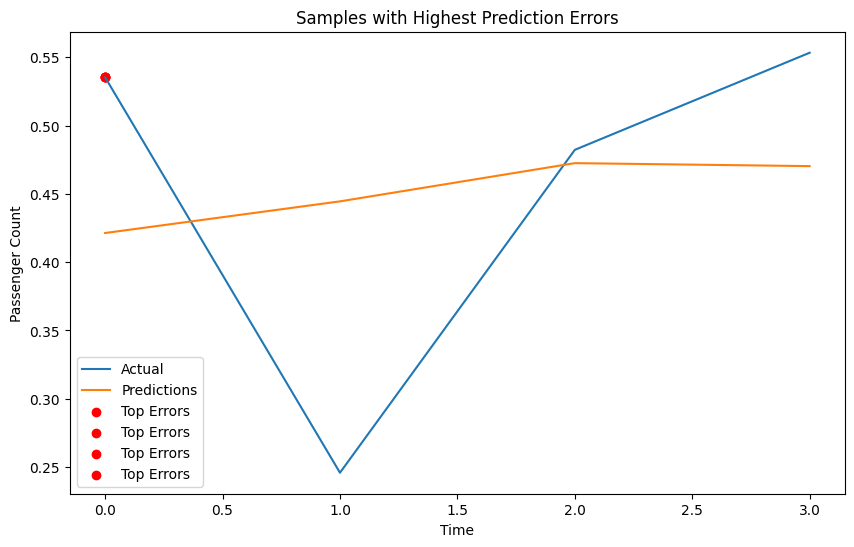

In [46]:
# En yüksek hata değerlerine sahip örneklerin indekslerini bulma
top_error_indices = np.abs(errors).argsort()[-5:][::-1]

# En yüksek hata değerlerine sahip örnekleri görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predictions')
for index in top_error_indices:
    plt.scatter(index, y_test[index], color='red', label='Top Errors' if index == top_error_indices[0] else '')
plt.title('Samples with Highest Prediction Errors')
plt.xlabel('Time')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()

#### Grafiksel Analizler:

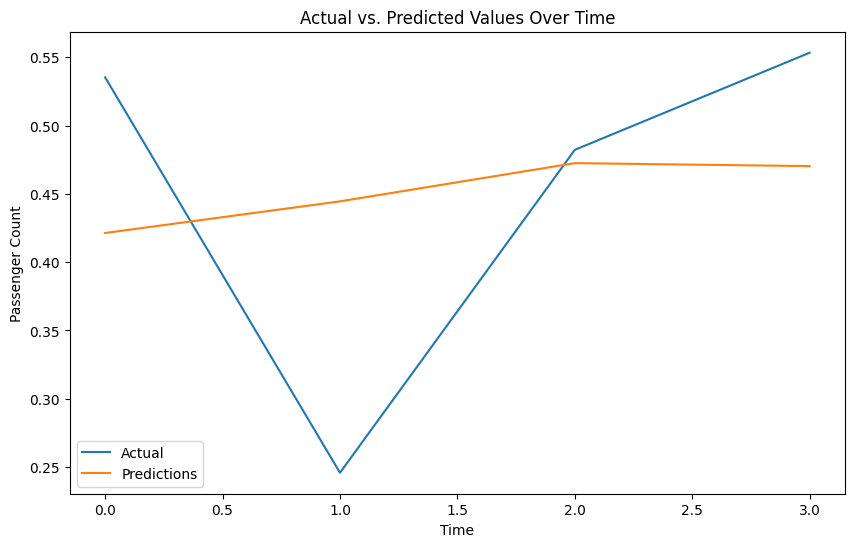

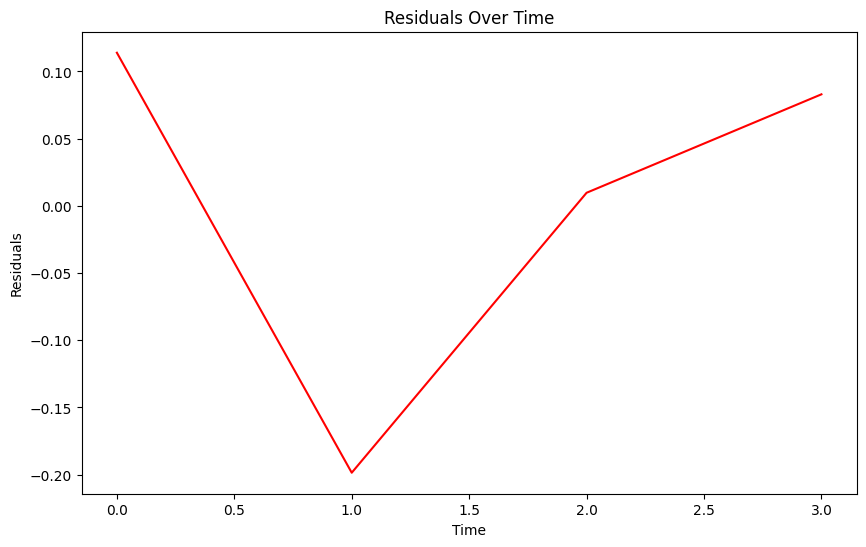

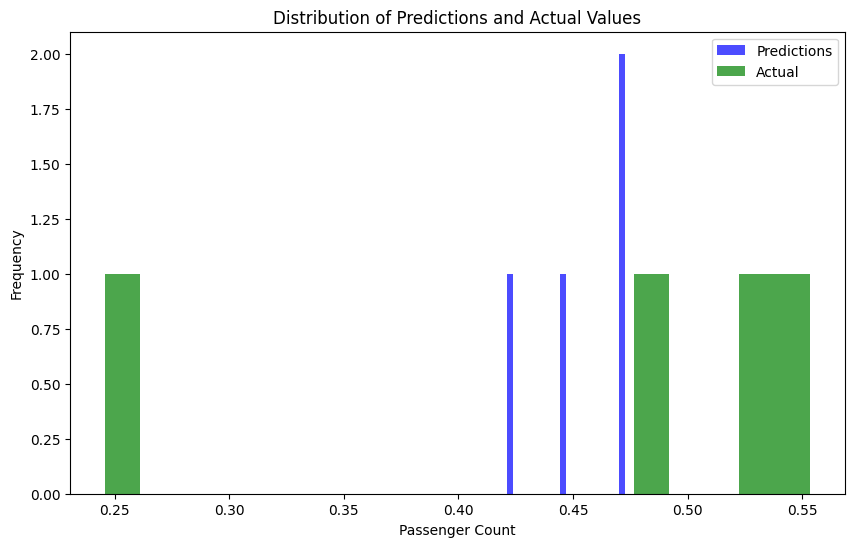

In [47]:
# Gerçek ve tahmin edilen değerlerin zaman serisi grafiği
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predictions')
plt.title('Actual vs. Predicted Values Over Time')
plt.xlabel('Time')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()

# Tahmin edilen ve gerçek değerler arasındaki farkın zaman serisi grafiği
plt.figure(figsize=(10, 6))
plt.plot(y_test - predictions, color='red')
plt.title('Residuals Over Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

# Tahmin edilen değerlerin dağılımının histogramı
plt.figure(figsize=(10, 6))
plt.hist(predictions, bins=20, alpha=0.7, label='Predictions', color='blue')
plt.hist(y_test, bins=20, alpha=0.7, label='Actual', color='green')
plt.title('Distribution of Predictions and Actual Values')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### Regresyon İstatistikleri:

Bu adımda, genellikle statsmodels kütüphanesini kullanarak regresyon istatistiklerini elde edebilirsiniz. Örneğin:

In [48]:
import statsmodels.api as sm

In [49]:
# Modeli oluştur
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X)

In [50]:
# Modeli uydur
results = model.fit()

In [51]:
# Model özetini görüntüle
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 17 Mar 2024   Prob (F-statistic):                nan
Time:                        19:34:33   Log-Likelihood:                 522.37
No. Observations:                  16   AIC:                            -1013.
Df Residuals:                       0   BIC:                            -1000.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5249        inf          0        n

c:\Users\astro\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  k, _ = kurtosistest(a, axis)
c:\Users\astro\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\astro\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\astro\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


##### Model Değerlendirme Metrikleri:

In [52]:
# R-kare skoru
r2 = r2_score(y_test, predictions)

# Ortalama Mutlak Hata (MAE)
mae = mean_absolute_error(y_test, predictions)

# Ortalama Kare Hata (MSE)
mse = mean_squared_error(y_test, predictions)

print("R-squared Score:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

R-squared Score: 0.01908428939412865
Mean Absolute Error: 0.10132120148499492
Mean Squared Error: 0.014852617301313455


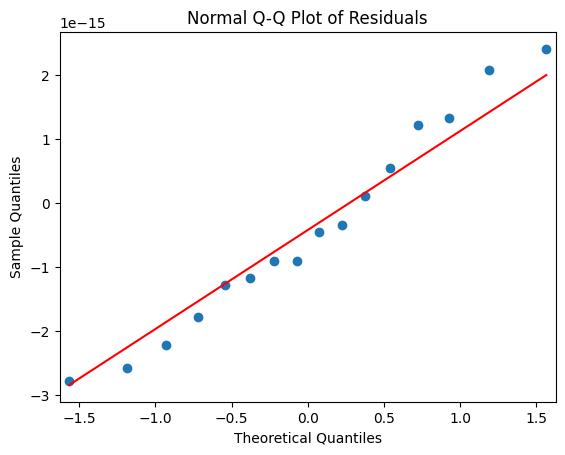

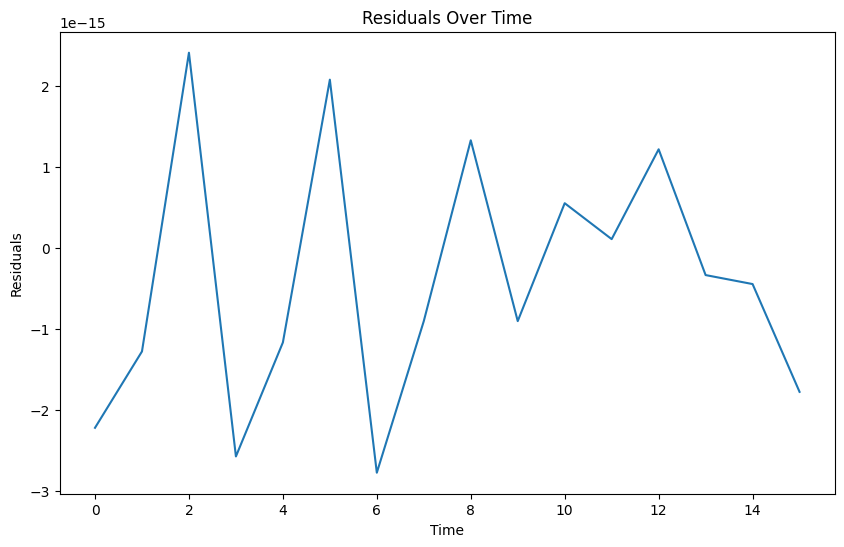

In [53]:
# Hataların normal dağılıma uygunluğunu kontrol etme
sm.qqplot(results.resid, line='s')
plt.title('Normal Q-Q Plot of Residuals')
plt.show()

# Kalıntıların zamanla değişimini gösterme
plt.figure(figsize=(10, 6))
plt.plot(results.resid)
plt.title('Residuals Over Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

In [54]:
# Analizleri ve performans çıktılarını kaydetmek için bir dosya oluştur
with open('model_analysis.txt', 'w') as f:
    # Grafiksel Analizler
    f.write("Graphical Analyses:\n")
    # (Buraya grafiklerle ilgili açıklamaları ve görsellerin kaydedilmesini sağlayacak kodları ekleyin)
    f.write("\n")

    # Regresyon İstatistikleri
    f.write("Regression Statistics:\n")
    # (statsmodels kullanarak elde ettiğiniz istatistikleri ve model özetini dosyaya yazın)
    f.write("\n")

    # Model Değerlendirme Metrikleri
    f.write("Model Evaluation Metrics:\n")
    f.write("R-squared Score: {}\n".format(r2))
    f.write("Mean Absolute Error: {}\n".format(mae))
    f.write("Mean Squared Error: {}\n".format(mse))
    f.write("\n")

    # Diyagnostik Grafikler
    f.write("Diagnostic Graphics:\n")
    # (Kalıntı analizi ve hata analizi için oluşturduğunuz grafiklerin açıklamalarını ve görsellerin kaydedilmesini sağlayacak kodları ekleyin)
    f.write("\n")

# Kaydedilen dosyanın tam yolunu yazdır
import os
print("Model analysis has been saved to:", os.path.abspath('model_analysis.txt'))

Model analysis has been saved to: c:\Users\astro\OneDrive\Masaüstü\airline_passenger_forecasting\model_analysis.txt


In [55]:
from joblib import dump, load

# Modeli kaydetme
dump(model, 'model.joblib')

# Modeli yükleme
loaded_model = load('model.joblib')